In [87]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt
import plotly.express as px
from jupyterthemes import jtplot
import os

In [36]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
jtplot.style()
jtplot.style(figsize=(25, 8.5),spines=False, gridlines='--',ticks=True)

In [26]:
orders = pd.read_csv('Orders.csv', index_col=0)
returns = pd.read_csv('Returns.csv', index_col=0)

In [33]:
orders.describe()

,Postal.Code,Quantity,Discount,Shipping.Cost
count,9994.000000,51290.000000,51290.000000,51290.000000
mean,55190.379428,3.476545,0.142908,26.478567
std,32063.693350,2.278766,0.212280,57.251373
min,1040.000000,1.000000,0.000000,1.002000
25%,23223.000000,2.000000,0.000000,2.610000
50%,56430.500000,3.000000,0.000000,7.790000
75%,90008.000000,5.000000,0.200000,24.450000
max,99301.000000,14.000000,0.850000,933.570000


In [34]:
returns.describe()

,Order ID,Region
count,1079,1079
unique,1079,24
top,CG-2015-PV898533-42225,Western Europe
freq,1,121


In [37]:
orders.head()

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
Row.ID,,,,,,,,,,,,,,,,,,,,,,,
40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [38]:
returns.head()

,Order ID,Region
Returned,,
Yes,CA-2012-SA20830140-41210,Central US
Yes,IN-2012-PB19210127-41259,Eastern Asia
Yes,CA-2012-SC20095140-41174,Central US
Yes,IN-2015-JH158207-42140,Oceania
Yes,IN-2014-LC168857-41747,Oceania


In [69]:
orders = pd.merge(orders,returns,
                 left_on='Order.ID', 
                 right_on = 'Order ID',
                 how='left')

In [73]:
def tranformrow(r):
    if pd.isna(r["Order ID"]):
        r["Order ID"] = 0
        return r
    else:
       r["Order ID"] = 1
       return r
    
orders = orders.apply(tranformrow,axis=1)

In [98]:
#orders[["Order ID"]]
orders.rename(columns={"Region_x": "Order.Region", "Region_y": "Return.Region"}, inplace=True)
orders.head()

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Order.Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order ID,Return.Region,year,month
0,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2.0,0.0,62.15,40.77,High,1,NaN,2014.0,11.0
1,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9.0,0.1,-288.77,923.63,Critical,1,NaN,2014.0,2.0
2,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9.0,0.1,919.97,915.49,Medium,1,NaN,2014.0,10.0
3,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5.0,0.1,-96.54,910.16,Medium,1,NaN,2014.0,1.0
4,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8.0,0.0,311.52,903.04,Critical,1,NaN,2014.0,11.0


In [93]:
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])
orders['year'] = orders['Order.Date'].dt.year
orders['month'] = orders['Order.Date'].dt.month

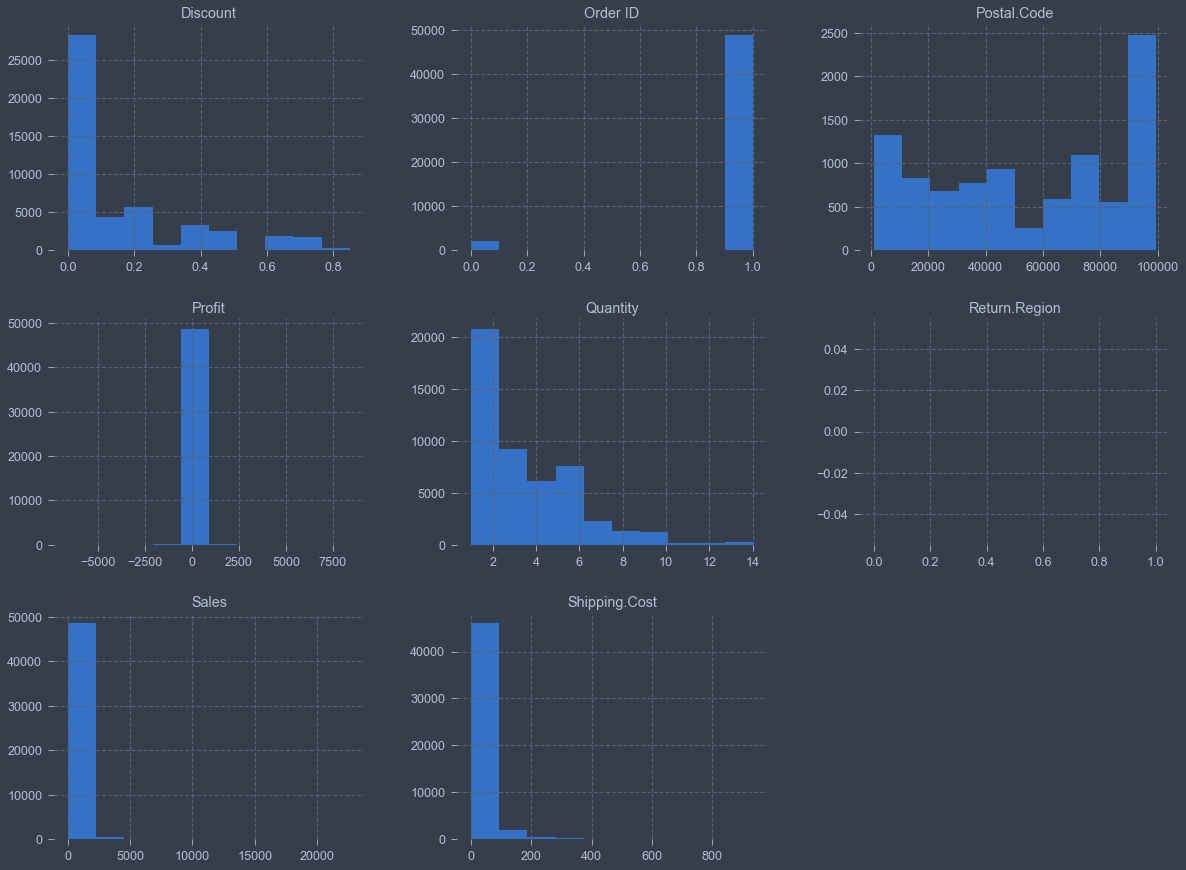

In [86]:
_ = orders.hist(figsize=(20,15))
orders['Sales'] = orders['Sales'].replace('[\$,]', '', regex=True).astype(float)
orders['Profit'] = orders['Profit'].replace('[\$,]', '', regex=True).astype(float)

In [146]:
#1.Is there any seasonal trend of inventory in the company?
#season = orders.groupby(['year','month']).sum()
fig = px.bar(season, x=season.index.levels[0], y='Quantity')
#fig.show()
#season.index[['year']




ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Postal.Code', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping.Cost', 'Order ID', 'Return.Region'] but received: Float64Index([2012.0, 2013.0, 2014.0, 2015.0], dtype='float64', name='year')

In [ ]:
#2. Is the seasonal trend the same for different categories?